<a href="https://colab.research.google.com/github/Sidra-g/Deep-Learning/blob/main/Cats_%26_Dogs_improved_Accuracy_with_VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Transfer_learning_feature_extraction(data_augmentation)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:04<00:00, 288MB/s]
100% 1.06G/1.06G [00:04<00:00, 234MB/s]


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [1]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg19 import VGG19

In [9]:
conv_base = keras.applications.VGG19(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(150, 150, 3),
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
    name="vgg19",
)

In [10]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [11]:
conv_base.trainable = False

In [12]:
from tensorflow.keras.utils import img_to_array,array_to_img, load_img
keras.utils.image_dataset_from_directory

<function keras.src.utils.image_dataset_utils.image_dataset_from_directory(directory, labels='inferred', label_mode='int', class_names=None, color_mode='rgb', batch_size=32, image_size=(256, 256), shuffle=True, seed=None, validation_split=None, subset=None, interpolation='bilinear', follow_links=False, crop_to_aspect_ratio=False, pad_to_aspect_ratio=False, data_format=None, verbose=True)>

In [13]:
from tensorflow.keras.utils import img_to_array,array_to_img, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [15]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
history = model.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 169s 251ms/step - accuracy: 0.8124 - loss: 0.4242 - val_accuracy: 0.8938 - val_loss: 0.2510
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 154s 245ms/step - accuracy: 0.8763 - loss: 0.2809 - val_accuracy: 0.8852 - val_loss: 0.2597
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 154s 244ms/step - accuracy: 0.8797 - loss: 0.2691 - val_accuracy: 0.9064 - val_loss: 0.2261
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 154s 244ms/step - accuracy: 0.8974 - loss: 0.2422 - val_accuracy: 0.9090 - val_loss: 0.2198
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 161s 255ms/step - accuracy: 0.8987 - loss: 0.2340 - val_accuracy: 0.9118 - val_loss: 0.2138
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 195s 244ms/step - accuracy: 0.8983 - loss: 0.2301 - val_accuracy: 0.9114 - val_loss: 0.2110
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 154s 245ms/step - accuracy: 0.9046 - loss: 0.2240 - val_accuracy: 0.8948 - val_loss: 0.2571
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 154s 244ms/step - accuracy: 0.9070 - loss: 0.21

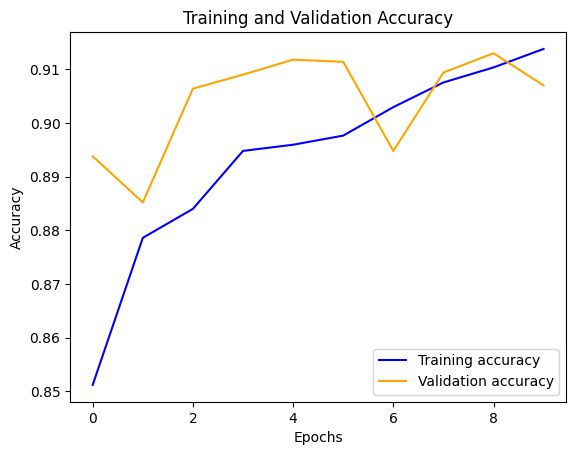

In [17]:
import matplotlib.pyplot as plt

# Plot training accuracy with a specific color
plt.plot(history.history['accuracy'], color='blue', label='Training accuracy')

# Plot validation accuracy with a specific color
plt.plot(history.history['val_accuracy'], color='orange', label='Validation accuracy')

# Add labels, title, and legend for better understanding
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Show the plot
plt.show()

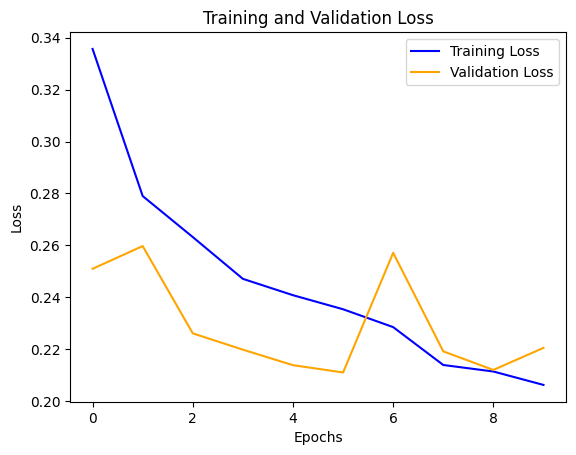

In [18]:
import matplotlib.pyplot as plt

# Plot training loss with a specific color
plt.plot(history.history['loss'], color='blue', label='Training Loss')

# Plot validation loss with a specific color
plt.plot(history.history['val_loss'], color='orange', label='Validation Loss')

# Add labels, title, and legend for better understanding
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Show the plot
plt.show()
